Notebook contém exploração e tratamento dos dados</br></br>
PSC
</br>
VL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data Exploration

### Commodities

In [2]:
df_com = pd.read_csv('commodity_data_complied.csv')

In [3]:
df_com.head(2)

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low,commodity_name,commodity_type
0,0,2021-09-10,72.92,25447.0,71.31,73.14,70.96,brent_crude,energy
1,1,2021-09-09,71.45,34814.0,72.62,73.19,70.89,brent_crude,energy


In [4]:
len(df_com['commodity_name'].unique())

27

Há dados referentes a 27 commodities no dataset.

In [5]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68464 entries, 0 to 68463
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      68464 non-null  int64  
 1   Date            68464 non-null  object 
 2   Close/Last      68464 non-null  float64
 3   Volume          56613 non-null  float64
 4   Open            68464 non-null  float64
 5   High            68464 non-null  float64
 6   Low             68464 non-null  float64
 7   commodity_name  68464 non-null  object 
 8   commodity_type  68464 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 4.7+ MB


Dados de commodities aparentam estar bastante completos, com exceção da coluna `Volume`. Será verificado a seguir como tratar esses dados.

In [6]:
a = pd.DataFrame(
    df_com['Volume'].isnull().groupby(df_com['commodity_name']).sum().astype(int)
)

a = a.join(
    df_com[['commodity_name', 'commodity_type']].set_index('commodity_name')
).reset_index().drop_duplicates(subset='commodity_name', keep='first')

a


,commodity_name,Volume,commodity_type
0,brent_crude,50,energy
2558,cbot_wheat,283,grains
5115,cocoa,1900,softs
7673,coffee,2029,softs
10231,copper,45,metals
12789,corn,274,grains
15346,cotton,1980,softs
17904,crude_oil,42,energy
20462,feeder_cattle,60,meat
23019,gold,48,metals


In [7]:
df_com['Volume'].isnull().groupby(df_com['commodity_type']).sum().astype(int)

commodity_type
energy     282
grains    2598
meat       613
metals     480
softs     7878
Name: Volume, dtype: int32

In [48]:
years = pd.DatetimeIndex(df_com['Date'])
years.year.unique()

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Date')

O Dataset possui dados do período `2011` - `2021`

### Debt

In [36]:
from paths import path_debt
df_deb = pd.read_csv(path_debt + "//" + "DebtPenny_19930401_20210927.csv")
df_deb.head(5)

,Record Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2021-09-27,2.225634e+13,6.170790e+12,2.842713e+13,1,2021,4,2021,3,9,27
1,2021-09-24,2.225856e+13,6.168603e+12,2.842716e+13,1,2021,4,2021,3,9,24
2,2021-09-23,2.226877e+13,6.158405e+12,2.842718e+13,1,2021,4,2021,3,9,23
3,2021-09-22,2.227225e+13,6.154922e+12,2.842717e+13,1,2021,4,2021,3,9,22
4,2021-09-21,2.226139e+13,6.165799e+12,2.842718e+13,1,2021,4,2021,3,9,21


In [37]:
df_deb = df_deb.sort_values(by= "Record Date", ascending=False)
df_deb.iloc[0:2]

,Record Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2021-09-27,2.225634e+13,6.170790e+12,2.842713e+13,1,2021,4,2021,3,9,27
1,2021-09-24,2.225856e+13,6.168603e+12,2.842716e+13,1,2021,4,2021,3,9,24


In [38]:
df_deb.iloc[-3:-1]

,Record Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
7145,1993-04-05,NaN,NaN,4.234896e+12,1,1993,3,1993,2,4,5
7146,1993-04-02,NaN,NaN,4.233931e+12,1,1993,3,1993,2,4,2


Dataset apresenta dados do período `02-01-1993` - `27-09-2021`

In [39]:
df_deb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Record Date                    7148 non-null   object 
 1   Debt Held by the Public        4190 non-null   float64
 2   Intragovernmental Holdings     4190 non-null   float64
 3   Total Public Debt Outstanding  7148 non-null   float64
 4   Source Line Number             7148 non-null   int64  
 5   Fiscal Year                    7148 non-null   int64  
 6   Fiscal Quarter Number          7148 non-null   int64  
 7   Calendar Year                  7148 non-null   int64  
 8   Calendar Quarter Number        7148 non-null   int64  
 9   Calendar Month Number          7148 non-null   int64  
 10  Calendar Day Number            7148 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 670.1+ KB


In [54]:
df_deb[['Debt Held by the Public', 'Intragovernmental Holdings']].isnull().groupby(
    by= df_deb['Fiscal Year']
).sum()

,Debt Held by the Public,Intragovernmental Holdings
Fiscal Year,,
1993,128,128
1994,253,253
1995,250,250
1996,251,251
1997,249,249
1998,246,246
1999,248,248
2000,250,250
2001,246,246


Os dados de *commodities* começam em 2011 e como não há valores ausentes no Dataset de dívida a partir do ano de 2006, não será necessário realizar tratamento sofisticado de valores ausentes. Os anos anteriores a 2011 serão apagados.

In [51]:
df_deb.dtypes

Record Date                       object
Debt Held by the Public          float64
Intragovernmental Holdings       float64
Total Public Debt Outstanding    float64
Source Line Number                 int64
Fiscal Year                        int64
Fiscal Quarter Number              int64
Calendar Year                      int64
Calendar Quarter Number            int64
Calendar Month Number              int64
Calendar Day Number                int64
dtype: object

In [52]:
df_deb['Record Date'] = pd.to_datetime(df_deb['Record Date'])

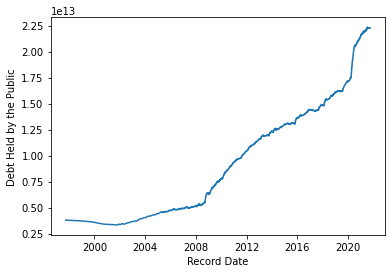

In [53]:
graph = sns.lineplot(
    data = df_deb,
    x = 'Record Date',
    y = 'Debt Held by the Public'
)

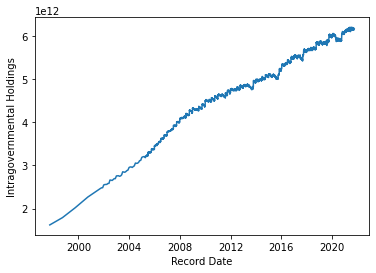

In [55]:
graph2 = sns.lineplot(
    data = df_deb,
    x = 'Record Date',
    y = 'Intragovernmental Holdings'
)

## Data prep - Commodities

Após o tratamento dos valores ausentes, será gerado arquivo que servirá de base para a elaboração dos *dashboards*. O tratamento de *outliers* não será aplicado porque eles representam dados históricos que tem importância. </br>


### *Missing* `Volume` values

Há grande concentração de valores não existentes em algumas categorias de commodities e em commodities específicos. Vamos montar um pipeline de preenchimento de *missings* para as categorias `energy, meat, metals`. As categorias `grains, softs` serão tratadas posteriormente

In [8]:
df_com['Date'] = pd.to_datetime(df_com['Date'])
df_com.dtypes

Unnamed: 0                 int64
Date              datetime64[ns]
Close/Last               float64
Volume                   float64
Open                     float64
High                     float64
Low                      float64
commodity_name            object
commodity_type            object
dtype: object

In [9]:
df_com = df_com.sort_values(by='Date', ascending=True)
df_com.head(2)

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low,commodity_name,commodity_type
48000,2558,2011-09-05,1876.9,NaN,1876.9,1876.9,1876.9,gold,metals
47999,2557,2011-09-06,1873.3,387937.0,1891.8,1923.6,1862.1,gold,metals


O `Volume` operado no dia apresenta informação importante para as análises, portanto os dados que faltam nessa coluna devem ser preenchidos de forma que a informação não fique muito diferente do que é possível. 
A fim de garantir esse cenário, os dados dos commodities  `energy, meat, metals` serão preenchidos com base na média móvel daquela categoria dos últimos 3 dias.

In [10]:
#####TESTE
mask = (df_com['commodity_type'] == 'metals')
    # criar média geral da categoria no dia
df_com.loc[mask, ['Volume', 'Date']].groupby(by='Date').mean()


,Volume
Date,
2011-09-05,NaN
2011-09-06,387937.00
2011-09-07,291976.00
2011-09-08,205878.00
2011-09-09,250860.00
...,...
2021-09-03,61291.80
2021-09-07,36354.00
2021-09-08,28639.25


In [11]:
mask_test = ((df_com['commodity_type'] == 'metals') & (df_com['Date'] == '2011-09-07'))
daily_avg_test = df_com.loc[mask_test, ['Volume', 'Date']].groupby(by='Date').mean()
# criar média geral da categoria no dia

daily_avg_test['Volume'].values[0]

291976.0

In [12]:
df_com.loc[mask, ['Volume', 'Date']].groupby(by='Date').mean().shape

(2563, 1)

In [13]:
# codigo demora para executar - realiza loop em todas as datas 3x
df_com['Vol_mov_avg'] = np.nan
df_com['avg_vol_traded'] = np.nan
for type in ['metals', 'meat', 'energy']:
    mask = (df_com['commodity_type'] == type)
    # criar média geral da categoria no dia
    for date in df_com.loc[mask, 'Date']:
        new_mask = ((df_com['Date']==date) & (df_com['commodity_type']== type))
        daily_avg = df_com.loc[new_mask, ['Volume', 'Date']].groupby(by='Date').mean()
        # coloca a média no lugar certo
        df_com.loc[new_mask, 'avg_vol_traded'] = daily_avg['Volume'].values[0]

    # criar média móvel com base na média da categoria
    df_com.loc[mask, 'Vol_mov_avg'] = df_com.loc[mask, 'avg_vol_traded'].rolling(window=3).mean()
    # popular coluna mm
    df_com.loc[mask, 'Vol_mov_avg'] = df_com.loc[mask, 'Vol_mov_avg'].ffill()
    df_com.loc[mask, 'Volume'] = df_com.loc[mask, 'Volume'].fillna(
        df_com['Vol_mov_avg']
    )
    # preenche alguns poucos valores que sobram (aprox 3 itens)
    df_com.loc[mask, 'Volume'] = df_com.loc[mask, 'Volume'].bfill()



In [14]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68464 entries, 48000 to 0
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      68464 non-null  int64         
 1   Date            68464 non-null  datetime64[ns]
 2   Close/Last      68464 non-null  float64       
 3   Volume          57988 non-null  float64       
 4   Open            68464 non-null  float64       
 5   High            68464 non-null  float64       
 6   Low             68464 non-null  float64       
 7   commodity_name  68464 non-null  object        
 8   commodity_type  68464 non-null  object        
 9   Vol_mov_avg     35802 non-null  float64       
 10  avg_vol_traded  35208 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 8.3+ MB


In [15]:
df_com['Volume'].isnull().groupby(df_com['commodity_type']).sum().astype(int)

commodity_type
energy       0
grains    2598
meat         0
metals       0
softs     7878
Name: Volume, dtype: int32

Os commodities do tipo `grains` e `softs` precisam de tratamento especial. Vamos explorar mais a condição desses dados:

In [16]:
data_compar = {
    'total_type' : df_com['commodity_type'].groupby(df_com['commodity_type']).count().astype(int),
    'total_missing' : df_com['Volume'].isnull().groupby(df_com['commodity_type']).sum().astype(int)
}

exploration = pd.DataFrame(data=data_compar)
exploration['perc'] = exploration['total_missing'] / exploration['total_type'] * 100

exploration

,total_type,total_missing,perc
commodity_type,,,
energy,12790,0,0.000000
grains,19866,2598,13.077620
meat,10228,0,0.000000
metals,12791,0,0.000000
softs,12789,7878,61.599812


In [17]:
mask = (df_com['commodity_type'] =='grains')
data_aux = df_com.loc[mask]

data_compar2 = {
    'total_name': data_aux['commodity_name'].groupby(
        data_aux['commodity_name']).count().astype(int),
    'total_missing': data_aux['Volume'].isnull().groupby(data_aux['commodity_name']).sum().astype(int)
}


exploration2 = pd.DataFrame(data=data_compar2)
exploration2['perc'] = exploration2['total_missing'] / exploration2['total_name'] * 100

exploration2


,total_name,total_missing,perc
commodity_name,,,
cbot_wheat,2557,283,11.067657
corn,2557,274,10.715682
oat,2557,375,14.665624
red_wheat,1967,41,2.084392
rough_rice,2557,368,14.391865
soybean,2557,423,16.542824
soybean_meal,2557,420,16.425499
soybean_oil,2557,414,16.190849


Os *missings* da categora `grains` estão divididos quase de maneira uniforme, com exceção dos commodities `corn, red_wheat`, que apresentam maior porcentagem de valores existentes.
Para realizar a população dessa categoria, será calculada a média entre a média móvel desses dois commodities, que será usada como valor base de população para os outros.

In [19]:
# setup dos valores base
mask_name = ((df_com['commodity_name'] == 'corn') | (df_com['commodity_name'] == 'red_wheat'))
# criar média de volume do dia p/ os dois valores de name
for date in df_com.loc[mask_name, 'Date']:
    new_mask2 = ((df_com['Date']==date) & ((df_com['commodity_name']== 'corn') | 
    (df_com['commodity_name']== 'red_wheat')
    ))
    daily_avg2 = df_com.loc[new_mask2, ['Volume', 'Date']].groupby(by='Date').mean()
    # coloca a média de volume dos dois names e coloca ela para todos os outros names da categoria
    final_mask = ((df_com['Date'] == date) & (df_com['commodity_type'] == 'grains'))
    df_com.loc[new_mask, 'avg_vol_traded'] = daily_avg2['Volume'].values[0]


mask_type2 = (df_com['commodity_type'] == 'grains')
# criar média móvel
df_com.loc[mask_type2, 'Vol_mov_avg'] = df_com.loc[mask_type2, 'Volume'].rolling(window=3).mean()
# popular coluna mm
df_com.loc[mask_type2, 'Vol_mov_avg'] = df_com.loc[mask_type2, 'Vol_mov_avg'].ffill()

df_com.loc[mask_type2, 'Volume'] = df_com.loc[mask_type2, 'Volume'].fillna(
    df_com['Vol_mov_avg']
)
# preenche alguns poucos valores que podem sobrar
df_com.loc[mask_type2, 'Volume'] = df_com.loc[mask_type2, 'Volume'].bfill()



In [20]:
df_com['Volume'].isnull().groupby(df_com['commodity_type']).sum().astype(int)

commodity_type
energy       0
grains       0
meat         0
metals       0
softs     7878
Name: Volume, dtype: int32

In [21]:
mask2 = (df_com['commodity_type'].isin(['softs']))
data_aux2 = df_com.loc[mask2]

data_compar3 = {
    'total_name': data_aux2['commodity_name'].groupby(
        data_aux2['commodity_name']).count().astype(int),
    'total_missing': data_aux2['Volume'].isnull().groupby(data_aux2['commodity_name']).sum().astype(int)
}


exploration3 = pd.DataFrame(data=data_compar3)
exploration3['perc'] = exploration3['total_missing'] / exploration3['total_name'] * 100

exploration3

,total_name,total_missing,perc
commodity_name,,,
cocoa,2558,1900,74.276779
coffee,2558,2029,79.319781
cotton,2558,1980,77.404222
lumber,2557,87,3.402425
nymex_sugar,2558,1882,73.573104


No caso da categoria `softs`, o único commodity que tem quantidade satisfatória de valores de `Volume` é `lumber`.
Seus valores serão usados como base para a população dos dados. Entendemos que esse método pode impactar significativamente a qualidade dos dados nessa categoria, visto que a madeira é um iten muito difernte dos demais na categoria.

In [22]:
for type in ['softs']:
    mask = (df_com['commodity_type'] == type)
    # criar média geral da categoria no dia
    for date in df_com.loc[mask, 'Date']:
        new_mask = ((df_com['Date']==date) & (df_com['commodity_type']== type))
        daily_avg = df_com.loc[new_mask, ['Volume', 'Date']].groupby(by='Date').mean()
        # coloca a média no lugar certo
        df_com.loc[new_mask, 'avg_vol_traded'] = daily_avg['Volume'].values[0]

    # criar média móvel com base na média da categoria
    df_com.loc[mask, 'Vol_mov_avg'] = df_com.loc[mask, 'avg_vol_traded'].rolling(window=3).mean()
    # popular coluna mm
    df_com.loc[mask, 'Vol_mov_avg'] = df_com.loc[mask, 'Vol_mov_avg'].ffill()
    df_com.loc[mask, 'Volume'] = df_com.loc[mask, 'Volume'].fillna(
        df_com['Vol_mov_avg']
    )
    # preenche alguns poucos valores que sobram (aprox 3 itens)
    df_com.loc[mask, 'Volume'] = df_com.loc[mask, 'Volume'].bfill()

In [23]:
df_com['Volume'].isnull().groupby(df_com['commodity_type']).sum().astype(int)

commodity_type
energy    0
grains    0
meat      0
metals    0
softs     0
Name: Volume, dtype: int32

Tratamento de valores ausentes concluído.

In [24]:
df_com.to_csv('commodity_data_filled.csv')

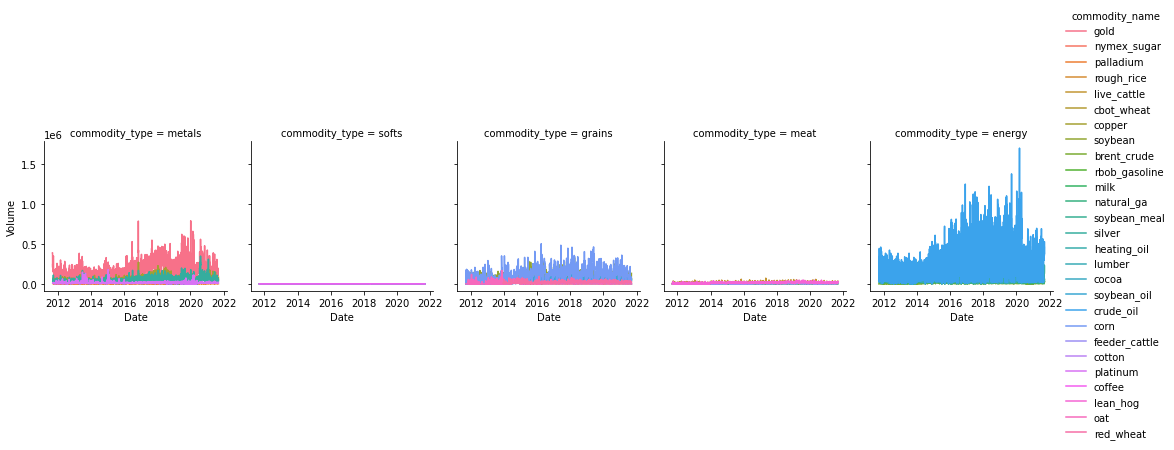

In [27]:
box = sns.FacetGrid(df_com, 
col="commodity_type",
hue="commodity_name"
)

box.map(
    sns.lineplot,
    "Date",
    "Volume"
)

box.add_legend()


## Data prep - Debt

### *Missing* values

In [57]:
df_deb = df_deb.loc[df_deb['Fiscal Year'] >= 2006]


In [58]:
df_deb[['Debt Held by the Public', 'Intragovernmental Holdings']].isnull().groupby(
    by= df_deb['Fiscal Year']
).sum()

,Debt Held by the Public,Intragovernmental Holdings
Fiscal Year,,
2006,0,0
2007,0,0
2008,0,0
2009,0,0
2010,0,0
2011,0,0
2012,0,0
2013,0,0
2014,0,0


Tratamento de valores ausentes concluído.

In [59]:
df_deb.to_csv('debt_data_processed.csv')

## Data processing

Dados serão usados para a construção de modelo preditivo. para isso é necessário juntar todos os dados num formato adequado.

In [60]:
df_com.head(1)

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low,commodity_name,commodity_type,Vol_mov_avg,avg_vol_traded
48000,2558,2011-09-05,1876.9,387937.0,1876.9,1876.9,1876.9,gold,metals,NaN,NaN


In [67]:
df_com_data = df_com.iloc[:, 1:9].copy()
df_com_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68464 entries, 48000 to 0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            68464 non-null  datetime64[ns]
 1   Close/Last      68464 non-null  float64       
 2   Volume          68464 non-null  float64       
 3   Open            68464 non-null  float64       
 4   High            68464 non-null  float64       
 5   Low             68464 non-null  float64       
 6   commodity_name  68464 non-null  object        
 7   commodity_type  68464 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 6.7+ MB


In [85]:
teste = df_com_data.loc[
    df_com_data['commodity_name'] == 'gold'
]

merge_teste = df_com_data.loc[
    df_com_data['commodity_name'] == 'silver'
]

teste

,Date,Close/Last,Volume,Open,High,Low,commodity_name,commodity_type
48000,2011-09-05,1876.9,387937.0,1876.9,1876.9,1876.9,gold,metals
47999,2011-09-06,1873.3,387937.0,1891.8,1923.6,1862.1,gold,metals
47998,2011-09-07,1817.6,291976.0,1813.5,1883.2,1795.1,gold,metals
47997,2011-09-08,1857.5,205878.0,1849.0,1873.3,1845.8,gold,metals
47996,2011-09-09,1859.5,250860.0,1861.0,1889.0,1825.8,gold,metals
...,...,...,...,...,...,...,...,...
45446,2021-08-30,1812.2,102579.0,1821.6,1826.5,1810.0,gold,metals
45445,2021-08-31,1818.1,162209.0,1812.2,1821.9,1803.4,gold,metals
45444,2021-09-01,1816.0,138802.0,1816.7,1822.7,1810.6,gold,metals
45443,2021-09-02,1811.5,111099.0,1816.2,1819.6,1806.5,gold,metals


In [94]:
a1 = teste.merge(
    merge_teste,
    how = 'left',
    left_on= 'Date',
    right_on= 'Date',
    suffixes=('_gold', '_silver')
)

a1.tail(3)


,Date,Close/Last_gold,Volume_gold,Open_gold,High_gold,Low_gold,commodity_name_gold,commodity_type_gold,Close/Last_silver,Volume_silver,Open_silver,High_silver,Low_silver,commodity_name_silver,commodity_type_silver
2556,2021-09-01,1816.0,138802.0,1816.7,1822.7,1810.6,gold,metals,24.221,47663.0,23.935,24.325,23.775,silver,metals
2557,2021-09-02,1811.5,111099.0,1816.2,1819.6,1806.5,gold,metals,23.918,36109.0,24.200,24.275,23.815,silver,metals
2558,2021-09-03,1833.7,181932.0,1811.5,1836.9,1810.9,gold,metals,24.802,64169.0,23.950,24.945,23.910,silver,metals


In [123]:
df_transformed = pd.DataFrame(
    index = df_com_data['Date']
)

In [124]:
names = df_com_data['commodity_name'].unique()
for name in names:
    df_hold = 0
    df_hold = df_com_data.loc[df_com_data['commodity_name'] == name]
    df_hold = df_hold.set_index('Date')
    df_transformed = df_transformed.merge(
        df_hold,
        how = 'left',
        left_index= True,
        right_on= 'Date',
        suffixes=(None, "_" + name)
    )

In [125]:
df_transformed

,Date,Close/Last,Volume,Open,High,Low,commodity_name,commodity_type,Close/Last_nymex_sugar,Volume_nymex_sugar,...,Low_oat,commodity_name_oat,commodity_type_oat,Close/Last_red_wheat,Volume_red_wheat,Open_red_wheat,High_red_wheat,Low_red_wheat,commodity_name_red_wheat,commodity_type_red_wheat
NaT,2011-09-05,1876.9,387937.0,1876.9,1876.9,1876.9,gold,metals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-06,1873.3,387937.0,1891.8,1923.6,1862.1,gold,metals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-07,1817.6,291976.0,1813.5,1883.2,1795.1,gold,metals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-08,1857.5,205878.0,1849.0,1873.3,1845.8,gold,metals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-09,1859.5,250860.0,1861.0,1889.0,1825.8,gold,metals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df_transformed = df_transformed.rename(
    columns=  {
        'Close/Last': 'Close/Last_gold',	
        'Volume': 'Volume_gold',	
        'Open': 'Open_gold',	
        'High': 'High_gold',	
        'Low': 'Low_gold',	
        'commodity_name': 'commodity_name_gold', 	
        'commodity_type': 'commodity_type_gold'
    }
)

In [130]:
cols = [c for c in df_transformed.columns if c.lower()[:9] != 'commodity']
df_transformed = df_transformed[cols]

df_transformed

,Date,Close/Last_gold,Volume_gold,Open_gold,High_gold,Low_gold,Close/Last_nymex_sugar,Volume_nymex_sugar,Open_nymex_sugar,High_nymex_sugar,...,Close/Last_oat,Volume_oat,Open_oat,High_oat,Low_oat,Close/Last_red_wheat,Volume_red_wheat,Open_red_wheat,High_red_wheat,Low_red_wheat
NaT,2011-09-05,1876.9,387937.0,1876.9,1876.9,1876.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-06,1873.3,387937.0,1891.8,1923.6,1862.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-07,1817.6,291976.0,1813.5,1883.2,1795.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-08,1857.5,205878.0,1849.0,1873.3,1845.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2011-09-09,1859.5,250860.0,1861.0,1889.0,1825.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
